# Relational database visualization

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')


/home/ateska/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'session id'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/ateska/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'rat id'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/home/ateska/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'original name'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, t

In [2]:
dfsession.head()

,index,session id,rat id,date,experimenter,original name,video name,VRspeed
0,0,0,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]
1,1,1,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]
2,2,2,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]
3,3,3,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]
4,4,4,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]


In [3]:
dfevent.head()

,Frame,Time,MotiveExpTimeSecs,visible,speed,session_id
0,0,0.000000,0.0,False,0.0,7
1,0,0.000000,0.0,False,0.0,7
2,1,0.004167,0.0,False,0.0,7
3,2,0.008333,0.0,False,0.0,7
4,3,0.012500,0.0,False,0.0,7


In [4]:
dfrat.head()

,index,Frame,Time,X_Pos,Y_Pos,Z_Pos,session_id,X_Ori,Y_Ori,Z_Ori
0,0,0,0.000000,-0.085285,0.051115,-0.039564,0,-0.736724,-0.675770,-0.023923
1,1,1,0.004167,-0.085192,0.051164,-0.039540,0,-0.735246,-0.677337,-0.025076
2,2,2,0.008333,-0.085136,0.051032,-0.039595,0,-0.729050,-0.683372,-0.038595
3,3,3,0.012500,-0.085103,0.051245,-0.039421,0,-0.735124,-0.677244,-0.030557
4,4,4,0.016667,-0.084992,0.051138,-0.039461,0,-0.728125,-0.683970,-0.044930


In [5]:
print(dfrat.keys(), '\n')
print(dfevent.keys(), '\n')
print(dfsession.keys(), '\n')

Index(['index', 'Frame', 'Time', 'X_Pos', 'Y_Pos', 'Z_Pos', 'session_id',
       'X_Ori', 'Y_Ori', 'Z_Ori'],
      dtype='object') 

Index(['Frame', 'Time', 'MotiveExpTimeSecs', 'visible', 'speed', 'session_id'], dtype='object') 

Index(['index', 'session id', 'rat id', 'date', 'experimenter',
       'original name', 'video name', 'VRspeed'],
      dtype='object') 



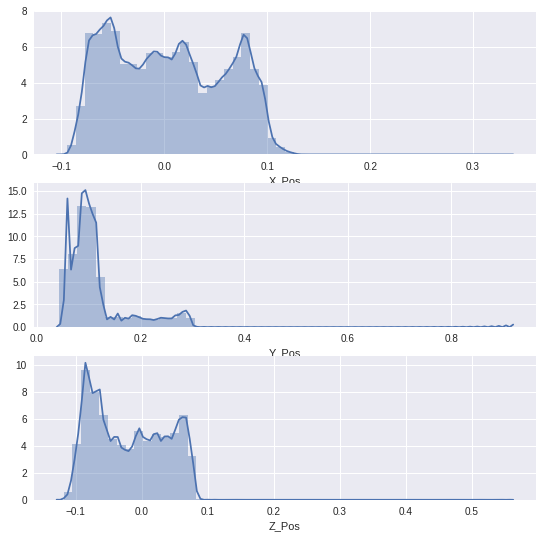

In [6]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
sns.distplot(dfrat.X_Pos, ax=ax1)
sns.distplot(dfrat.Y_Pos, ax=ax2)
sns.distplot(dfrat.Z_Pos, ax=ax3)

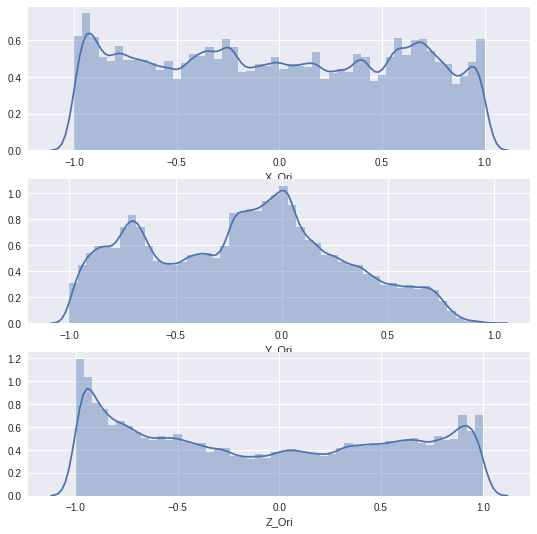

In [7]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
sns.distplot(dfrat.X_Ori, ax=ax1)
sns.distplot(dfrat.Y_Ori, ax=ax2)
sns.distplot(dfrat.Z_Ori, ax=ax3)

## Per experiment visualization of position and orientation 

KeyError: 'session id'

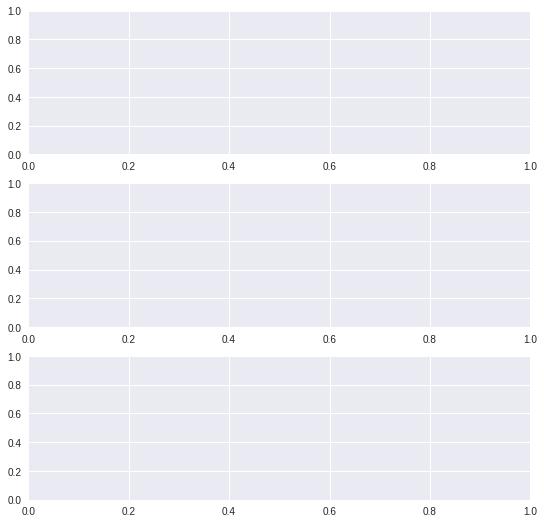

In [8]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
for i in range(0,7):
    sns.distplot(dfrat.X_Ori[dfrat['session id'] == i], ax=ax1)
    sns.distplot(dfrat.Y_Ori[dfrat['session id'] == i], ax=ax2)
    sns.distplot(dfrat.Z_Ori[dfrat['session id'] == i], ax=ax3)

In [ ]:
dfrat.hist(column='X_Pos', by='session_id');

In [ ]:
g = sns.FacetGrid(col='session_id', col_wrap=3, data=dfrat, size=3)
g.map(sns.distplot, 'X_Pos');


In [ ]:
pos_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension'
          )
pos_l.head()

In [ ]:
g = sns.FacetGrid(col='Dimension', hue='session_id', data=pos_l)
g.map(sns.distplot, 'Position')

In [ ]:
sns.factorplot(x='Dimension', y='Position', data=pos_l, kind='box', )

In [ ]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
for i in range(0,7):
    sns.distplot(dfrat.X_Pos[dfrat['session id'] == i], ax=ax1)
    sns.distplot(dfrat.Y_Pos[dfrat['session id'] == i], ax=ax2)
    sns.distplot(dfrat.Z_Pos[dfrat['session id'] == i], ax=ax3)